## Практическая работа №5
##### Сиразетдинов Рустем (Вариант - 24)

Первичный анализ датасета и начальная подготовка данных для Практической работы №6 


Предсказание стоимости медецинской страховки

Данные: https://www.kaggle.com/mirichoi0218/insurance

0. Подключение библиотек

In [2]:
import numpy as np # библиотека для эффективной работы с данными
import pandas as pd # библиотека для работы с наборами данных
import matplotlib.pyplot as plt # библиотека для визуализации
import seaborn as sns # еще одна библиотека для построения графиков

0.1 Чтение данных из файла

In [3]:
data = pd.read_csv('C:\\Users\\averu\\Documents\\git_local\\programming-practice\\IDA-practice-5\\insurance.csv')

__Вопрос 1.__ 

In [4]:
data.shape

(1338, 7)

В выбранном датасете 1338 объектов и 7 признаков. Посмотрим на начальную таблицу.

In [5]:
data.head(7)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


| Название переменной | Тип перменной |                                                           Описание |
| ------------------- |:-------------:| ------------------------------------------------------------------:|
| `age`               |     int64     |                                      возраст основного бенефициара |
| `sex`               |    string     |                               пол бенефициара: женщина или мужчина |
| `bmi`               |    float64    | индекс массы тела (от 18,5 до 24,9 - положительные рамки значения) |
| `children`          |     int64     |                                    количество застрахованных людей |
| `smoker`            |    string     |                                 является ли бенефициар курильщиком |
| `region`            |    string     |                              район, в котором проживает бенефициар |
| `charges`           |    float64    |      индивудуальные расходы, оплачиваемые медецинским страхованием |

__Вопросы 2-5__

Категориальные признаки представленные в датасете- `region`

`region`- клиент проживает в юго-восточной, юго-западной, северо-западной, северо восточной части стран?

In [7]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Признак `region` имеет наибольшее количество уникальных значений - 4 = {southeast, southwest, northwest, northeast}.

В датасете имеются бинарные признаки: `sex` и `smoker`.

`sex`- клиент мужчина или женщина?

`smoker`- клиет является курильщиком, или клиен не курит?

В датасете имеются также и числовые признаки: `age`, `children`, `bmi`, `charges`. Их описание можно посмотреть в таблице. 

Обработаем категориальные признаки.

In [10]:
region = pd.get_dummies(data['region']) 
data = pd.concat((data, region), axis=1)
data = data.loc[:, data.columns.isin(['age', 'sex', 'bmi', 'children' , 'smoker', 'charges', 'northeast', 'northwest','southeast', 'southwest'])]
data.head(7)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
5,31,female,25.740,0,no,3756.62160,0,0,1,0
6,46,female,33.440,1,no,8240.58960,0,0,1,0


__Вопросы 6-8__

Проверим данные на наличие пропусков

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(2), uint8(4)
memory usage: 68.1+ KB


Всего в датасете представленны данные о 1338 клиентах, в каждой строке, отвечающей одному из признаков по 1338 значений, значит можно сделать вывод о том, что в датасете отсутствуют пропуски. Значит нам не предетеся их отдельно обрабатывать.  

__Вопрос 9__

Проверим датасет на наличие в нем аномальных значений.

In [12]:
data.describe()

,age,bmi,children,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


Как можно видеть из представленной таблицы, среднее значение расходов по медецинской страховке - 13270.4 пунктов, но максимальное значение этого же столбца - 63770.4 пункта, что превышает среднее значение почти в 5 раз. Можно утверждать, что это и есть искомое аномальное значение.  Кроме того, стоит обратить внимание на столбец `bmi` - индекс массы тела, который у желательно должен быть в рамках от 18.5 до 24.9, хотя из таблицы видно, что даже у четверти клиентов нет таких показателей. Среднее значение значение этого показателя у клиетов  30.7, что превышает норму более чем на 5 пунктов. В целом можно сказть, что большинство клиентов имееют ожирение. Давайте посмотрим на это более детально.

Text(0, 0.5, 'charges')

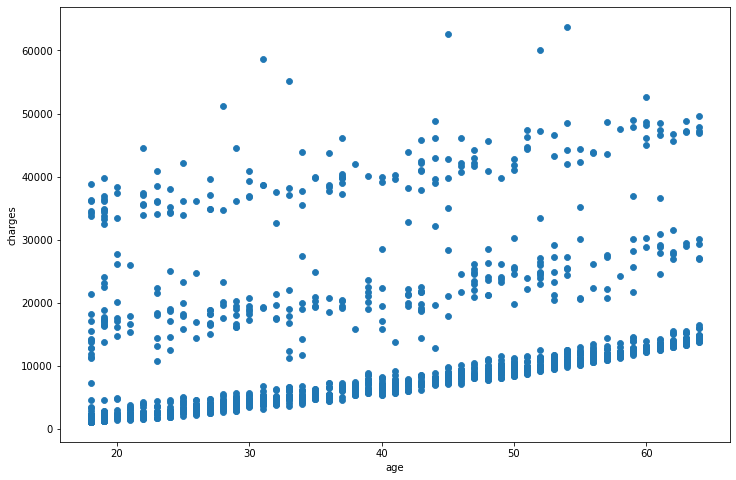

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(data.age, data.charges, linewidth=0.8)

plt.xlabel('age')
plt.ylabel('charges')

Сравним рост индекса массы тела с ростом возраста и с ростом индивидуальных расходов по медецинской страховке

In [14]:
data.corr()

,age,bmi,children,charges,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


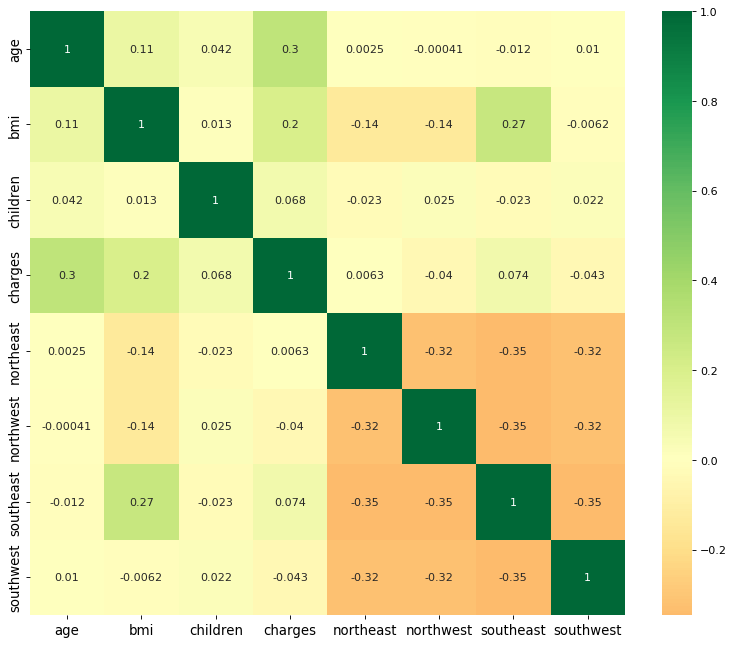

In [15]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Text(0, 0.5, 'children')

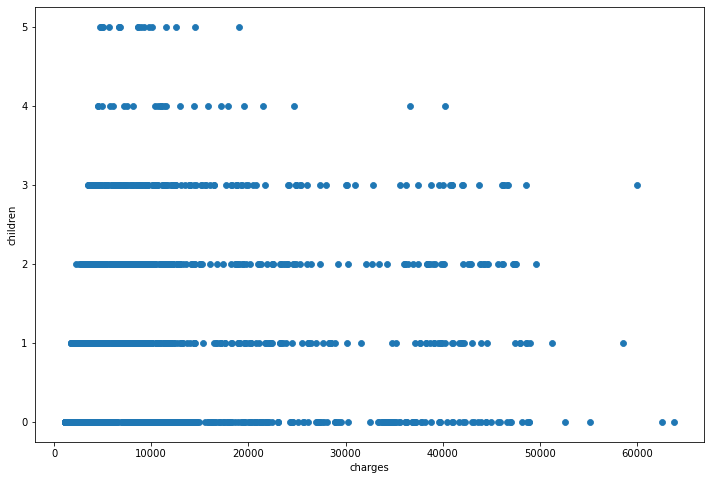

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(data.charges, data.children, linewidth=0.8)

plt.xlabel('charges')
plt.ylabel('children')

Text(0, 0.5, 'children')

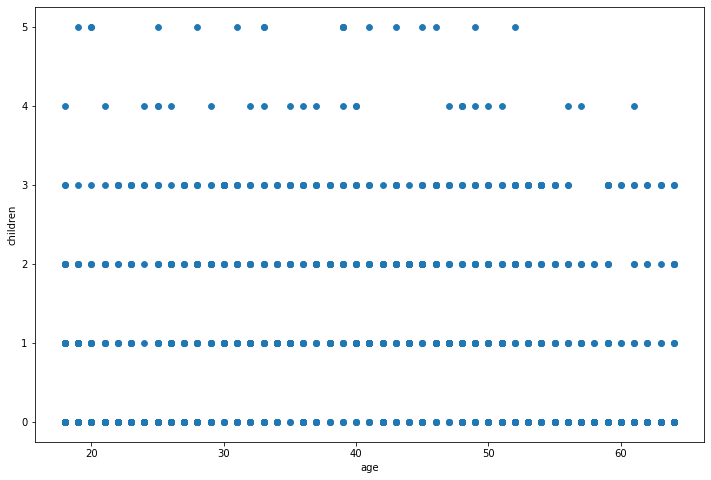

In [17]:
plt.figure(figsize=(12,8))
plt.scatter(data.age, data.children, linewidth=0.8)

plt.xlabel('age')
plt.ylabel('children')

Text(0, 0.5, 'bmi')

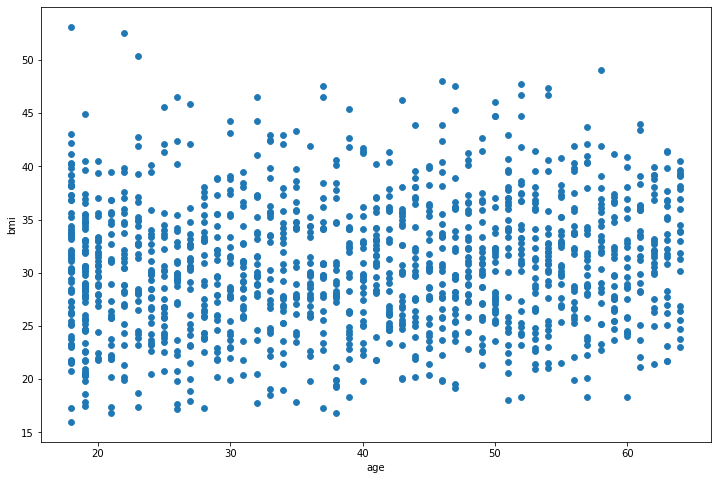

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(data.age, data.bmi, linewidth=0.8)

plt.xlabel('age')
plt.ylabel('bmi')

Text(0, 0.5, 'bmi')

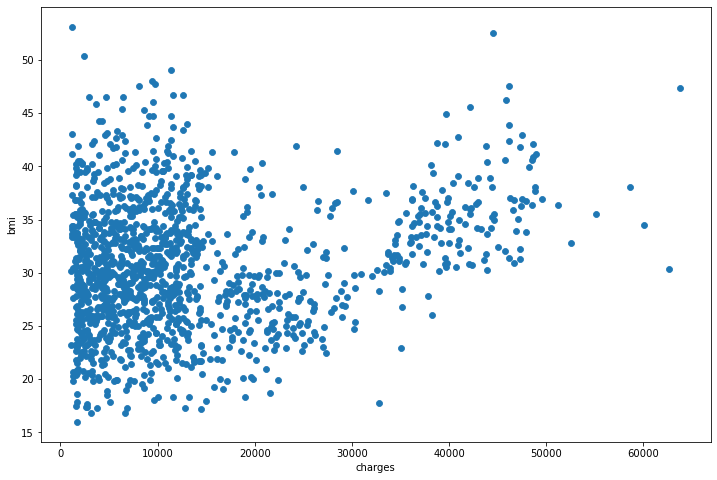

In [19]:
plt.figure(figsize=(12,8))
plt.scatter(data.charges, data.bmi, linewidth=0.8)

plt.xlabel('charges')
plt.ylabel('bmi')

В итоге никакой простой зависимотси роста индекса тела от возрасти или от медецинских расходов выявить не удалось, это значит, что нет повышения или понижения возраста или медецинских расходов связванных индксом массы тела. Т.е. другими словами, практически каждый клиет имеет индекс массы тела выше нормы, но медецинские расходы не связаны с лечением ожирения, значит это является нормальным в районах, где они живут.

__Вопрос 10__

Произведем нармализацию значений признаков

In [20]:
data['sex'] = np.where(data['sex'] == 'female' , 0, data['sex'])
data['sex'] = np.where(data['sex'] == 'male' , 1, data['sex'])

data['smoker'] = np.where(data['smoker'] == 'no' , 0, data['smoker'])
data['smoker'] = np.where(data['smoker'] == 'yes' , 1, data['smoker'])

In [21]:
# from sklearn.preprocessing import StandardScaler 
# scale_features_std = StandardScaler() 
# features_std = scale_features_std.fit_transform(data[['age', 'bmi', 'charges']]) 
# features_std

In [22]:
data['age'] = data['age']/data['age'].median()
data['bmi'] = data['bmi']/data['bmi'].median()
data['charges'] = data['charges']/data['charges'].median()
data['children'] = data['children']/data['children'].median()

Text(0, 0.5, 'bmi')

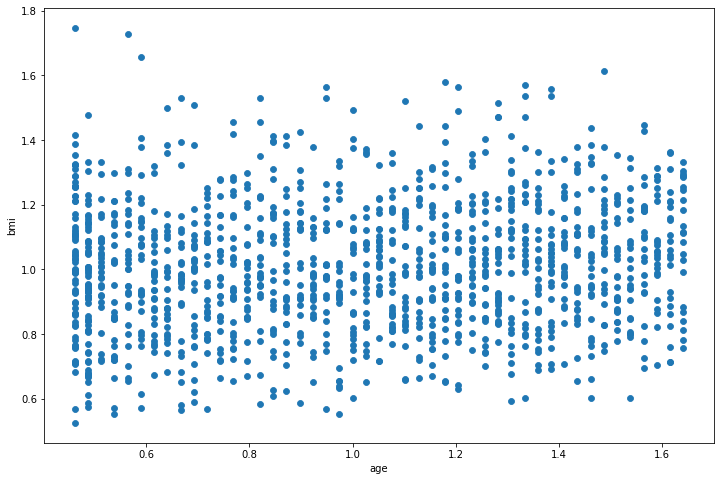

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(data.age, data.bmi, linewidth=0.8)

plt.xlabel('age')
plt.ylabel('bmi')

Text(0, 0.5, 'charges')

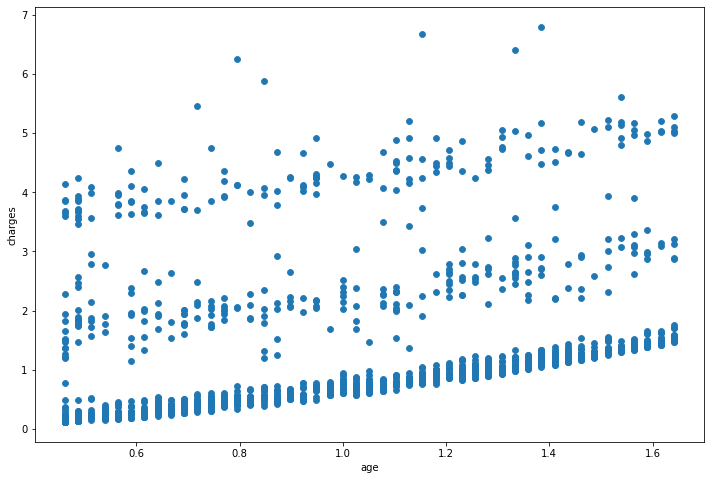

In [24]:
plt.figure(figsize=(12,8))
plt.scatter(data.age, data.charges, linewidth=0.8)

plt.xlabel('age')
plt.ylabel('charges')

In [25]:
data.head(7)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.487179,0,0.917763,0.0,1,1.799708,0,0,0,1
1,0.461538,1,1.110855,1.0,0,0.183921,0,0,1,0
2,0.717949,1,1.085526,3.0,0,0.474254,0,0,1,0
3,0.846154,1,0.746875,0.0,0,2.343252,0,1,0,0
4,0.820513,1,0.950000,0.0,0,0.412155,0,1,0,0
5,0.794872,0,0.846711,0.0,0,0.400406,0,0,1,0
6,1.179487,0,1.100000,1.0,0,0.878337,0,0,1,0


In [56]:
data.describe()

,age,bmi,children,charges,northeast,northwest,southeast,southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.005308,1.008664,1.094918,1.414451,0.242152,0.242900,0.272048,0.242900
std,0.360255,0.200598,1.205493,1.290766,0.428546,0.428995,0.445181,0.428995
min,0.461538,0.525000,0.000000,0.119577,0.000000,0.000000,0.000000,0.000000
25%,0.692308,0.865008,0.000000,0.505252,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.307692,1.141242,2.000000,1.773593,0.000000,0.000000,1.000000,0.000000
max,1.641026,1.747697,5.000000,6.797080,1.000000,1.000000,1.000000,1.000000


`charges` - столбец с максимальным средним значением после нормированиея признаков через стандартное отклонение	

__Вопрос 11__

В качестве целевого признака будет выбран - `charges`

In [57]:
target = data.charges
train = data.drop(['charges'], axis=1)

train.head(7)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,0.487179,0,0.917763,0.0,1,0,0,0,1
1,0.461538,1,1.110855,1.0,0,0,0,1,0
2,0.717949,1,1.085526,3.0,0,0,0,1,0
3,0.846154,1,0.746875,0.0,0,0,1,0,0
4,0.820513,1,0.950000,0.0,0,0,1,0,0
5,0.794872,0,0.846711,0.0,0,0,0,1,0
6,1.179487,0,1.100000,1.0,0,0,0,1,0


**Вопрос 12**

поскольу параметр `test_size` имеет значение 0.3, а все объекты разделяются тренировачную и обучаемую выборки, то количество объектов в тренировачной выборке будет равно 0.7 от общего числа объектов. Параметр `random_state` отвечает за начальное значение случайного числа, используемого для перетасовки т.е. чтобы сделать эксперимент воспроизводимым

**Вопрос 13**

Проверим линейную зависимость между введенными признаками

In [58]:
data.corr()

,age,bmi,children,charges,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


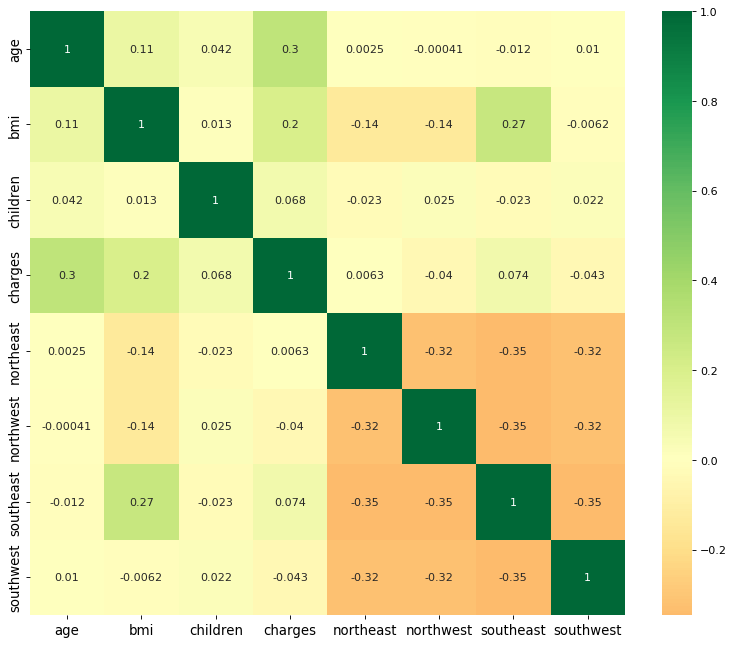

In [59]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<AxesSubplot:>

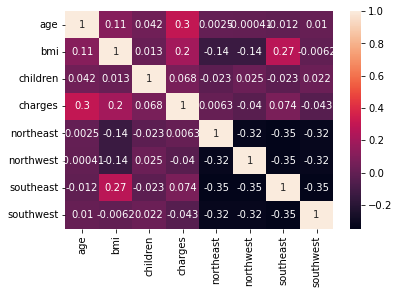

In [60]:
sns.heatmap(data.corr(),annot=True)

Как можно видеть из представленных графиков в датасете между признаки не наблюдается значительной зависимости.

Выделение тренировочной и тестовой выборки

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print (N_train, N_test)

1003 335


В обучающую выборку попало 1003 значения, в тестовую - 335 значений

**Вопрос 14-15**

Воспользуемся методом главных компонент

In [62]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [63]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

In [64]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,train.columns)))
    print('\n')

1 component: 52.17% of initial variance
0.018 x age + 0.009 x sex + -0.001 x bmi + 0.999 x children + 0.009 x smoker + 0.004 x northeast + 0.017 x northwest + -0.014 x southeast + -0.006 x southwest


2 component: 9.44% of initial variance
-0.002 x age + -0.540 x sex + 0.097 x bmi + 0.022 x children + 0.006 x smoker + -0.344 x northeast + -0.346 x northwest + 0.679 x southeast + 0.011 x southwest


3 component: 9.1% of initial variance
0.041 x age + -0.574 x sex + -0.040 x bmi + 0.004 x children + -0.136 x smoker + 0.065 x northeast + -0.159 x northwest + -0.507 x southeast + 0.601 x southwest


4 component: 8.96% of initial variance
-0.034 x age + -0.145 x sex + -0.028 x bmi + 0.005 x children + 0.059 x smoker + 0.786 x northeast + -0.506 x northwest + 0.034 x southeast + -0.314 x southwest


5 component: 8.65% of initial variance
-0.013 x age + 0.583 x sex + 0.048 x bmi + 0.010 x children + 0.104 x smoker + -0.067 x northeast + -0.585 x northwest + 0.116 x southeast + 0.535 x southwe

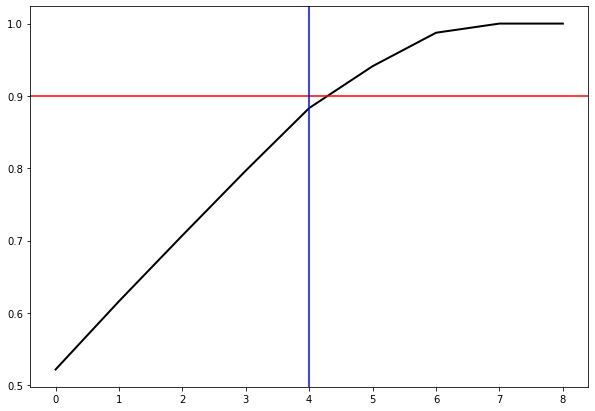

In [65]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.axhline(0.9, c='r')
plt.axvline(4, c='b')

Как итог, получим, что описания почти 90% дисперсии данных достаточно 4-х компонент. По построенным линейным моделям видно, что наибольший вклад вносит признак `children`

In [ ]:
# # from pandas import pandas_profiling
# from pandas_profiling import ProfileReport
# ProfileReport(data)

In [ ]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)